### Import Libraries

In [1]:
#Data Manipulation Libraries
import numpy as np
import pandas as pd

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Time series Forecasting Libraries
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#Evaluation Metrics Libraries
from sklearn.metrics import mean_absolute_percentage_error as mape

#warnings
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
#Importing Footfalls Dataset
walmart=pd.read_csv('footfalls.csv')
walmart.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


### Data Understanding

In [3]:
walmart.shape

(159, 17)

In [4]:
#Check if there is any null entries in the DF
walmart.isna().sum()

Month            0
Footfalls        0
t                0
log_footfalls    0
t_square         0
Jan              0
Feb              0
Mar              0
Apr              0
May              0
Jun              0
Jul              0
Aug              0
Sep              0
Oct              0
Nov              0
Dec              0
dtype: int64

In [5]:
walmart.dtypes

Month             object
Footfalls          int64
t                  int64
log_footfalls    float64
t_square           int64
Jan                int64
Feb                int64
Mar                int64
Apr                int64
May                int64
Jun                int64
Jul                int64
Aug                int64
Sep                int64
Oct                int64
Nov                int64
Dec                int64
dtype: object

### Data Preparation

In [6]:
#Split the Data frame into train and test data
train_data = walmart.head(147)
test_data  = walmart.tail(12)

In [7]:
train_data.shape,test_data.shape

((147, 17), (12, 17))

### Moving Average Model

<AxesSubplot:>

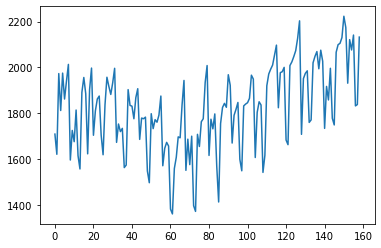

In [8]:
walmart.Footfalls.plot()

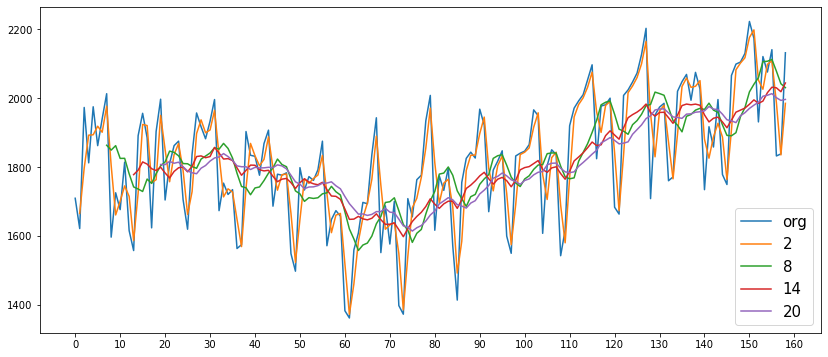

In [9]:
#Plotting Moving average model

plt.figure(figsize=(14,6))
walmart['Footfalls'].plot(label='org')
for i in range(2,24,6):
    walmart['Footfalls'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='lower right',fontsize =15)
plt.xticks(np.arange(0,170,10))
plt.show()

### Seasonal Decompose - Time series Decomposition plot

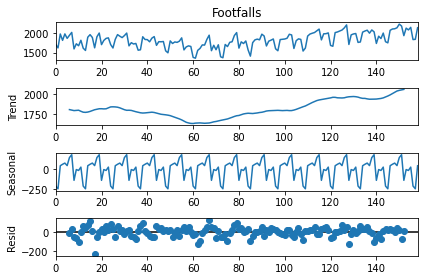

In [10]:
seasonal_decompose_data=seasonal_decompose(walmart['Footfalls'],period=12)
seasonal_decompose_data.plot()
plt.show()

### ACF and PACF Plots

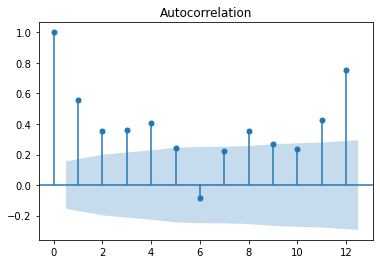

In [11]:
plot_acf(walmart['Footfalls'],lags=12)
plt.show()

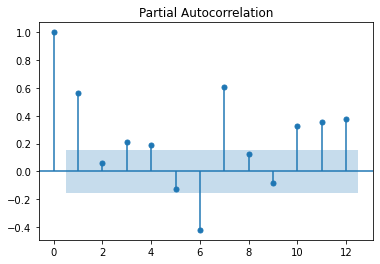

In [12]:
plot_pacf(walmart['Footfalls'],lags=12)
plt.show()

### Model Training // Model Prediction // Model Evaluation

In [13]:
#Model Training using Simple Exponential Smoothing method on training data

print('Simple Exponential Method - Evaluation\n')
ses=SimpleExpSmoothing(endog=train_data['Footfalls']).fit(smoothing_level=0.2)

#Model Prediction on test data (only providing future index)
pred_ses=ses.predict(start=test_data.index[0], end=test_data.index[-1])
print('Predicted Values are :\n',pred_ses)

#Model Evaluation
mape_ses=mape(y_true=test_data['Footfalls'], y_pred=pred_ses)
print('\n','Mean absolute percentage error on Simple Exponential Method :\n',mape_ses)

Simple Exponential Method - Evaluation

Predicted Values are :
 147    1913.677017
148    1913.677017
149    1913.677017
150    1913.677017
151    1913.677017
152    1913.677017
153    1913.677017
154    1913.677017
155    1913.677017
156    1913.677017
157    1913.677017
158    1913.677017
dtype: float64

 Mean absolute percentage error on Simple Exponential Method :
 0.08490637057828364


In [14]:
#Model Training using Holts method on training data

print('Holts Method - Evaluation\n')
holt=Holt(endog=train_data['Footfalls']).fit(smoothing_level=0.8,smoothing_slope=0.2)

#Model Prediction on test data (only providing future index)
pred_holt=holt.predict(start=test_data.index[0], end=test_data.index[-1])
print('Predicted Values are :\n',pred_holt)

#Model Evaluation
mape_holt=mape(y_true=test_data['Footfalls'], y_pred=pred_holt)
print('\n','Mean absolute percentage error on Holts Method :\n',mape_holt)

Holts Method - Evaluation

Predicted Values are :
 147    2021.566977
148    2044.942083
149    2068.317189
150    2091.692296
151    2115.067402
152    2138.442509
153    2161.817615
154    2185.192721
155    2208.567828
156    2231.942934
157    2255.318040
158    2278.693147
dtype: float64

 Mean absolute percentage error on Holts Method :
 0.07546249229496066


In [15]:
#Model Training using Winters Exponential Smoothing method on training data - Additive Seasonality and Additive Trend

print('Winters Exponential Smoothing method - Additive Seasonality and Additive Trend - Evaluation\n')
winter_add_add=ExponentialSmoothing(endog=train_data['Footfalls'],seasonal='add',trend='add',seasonal_periods=12).fit()

#Model Prediction on test data (only providing future index)
pred_winter_add_add=winter_add_add.predict(start=test_data.index[0], end=test_data.index[-1])
print('Predicted Values are :\n',pred_winter_add_add)

#Model Evaluation
mape_winter_add_add=mape(y_true=test_data['Footfalls'], y_pred=pred_winter_add_add)
print('\n','Mean absolute percentage error on Winters Exponential Smoothing method :\n',mape_winter_add_add)

Winters Exponential Smoothing method - Additive Seasonality and Additive Trend - Evaluation

Predicted Values are :
 147    2042.570947
148    2061.617141
149    2037.624973
150    2122.313635
151    2137.062400
152    1807.153101
153    2005.738050
154    1990.622174
155    2063.159700
156    1804.160043
157    1770.395347
158    2027.587126
dtype: float64

 Mean absolute percentage error on Winters Exponential Smoothing method :
 0.03750501039729507


In [16]:
#Model Training using Winters Exponential Smoothing method on training data - Multiplicative Seasonality and Additive Trend

print('Winters Exponential Smoothing method - Multiplicative Seasonality and Additive Trend - Evaluation\n')
winter_multi_add=ExponentialSmoothing(endog=train_data['Footfalls'],seasonal='mul',trend='add',seasonal_periods=12).fit()

#Model Prediction on test data (only providing future index)
pred_winter_Multi_add=winter_multi_add.predict(start=test_data.index[0], end=test_data.index[-1])
print('Predicted Values are :\n',pred_winter_Multi_add)

#Model Evaluation
mape_winter_Multi_add=mape(y_true=test_data['Footfalls'], y_pred=pred_winter_Multi_add)
print('\n','Mean absolute percentage error on Winters Exponential Smoothing method :\n',mape_winter_Multi_add)

Winters Exponential Smoothing method - Multiplicative Seasonality and Additive Trend - Evaluation

Predicted Values are :
 147    2037.021148
148    2058.316403
149    2035.103329
150    2122.712836
151    2139.011400
152    1796.258758
153    2002.064078
154    1986.606559
155    2065.485443
156    1798.095818
157    1762.757914
158    2021.807133
dtype: float64

 Mean absolute percentage error on Winters Exponential Smoothing method :
 0.039398210657554195


### Consolidated Evaluation Metrics

In [17]:
pd.set_option('display.max_colwidth',None)
final=pd.DataFrame()
final['Evaluation Metrics']=pd.Series(['Simple Exponential Smoothing','Holts method',
                                       'Winters Exponential Smoothing - Additive Seasonality and Additive Trend',
                                       'Winters Exponential Smoothing - Multiplicative Seasonality and Additive Trend'])
final['Value']= pd.Series([mape_ses,mape_holt,mape_winter_add_add,mape_winter_Multi_add])
final

,Evaluation Metrics,Value
0,Simple Exponential Smoothing,0.084906
1,Holts method,0.075462
2,Winters Exponential Smoothing - Additive Seasonality and Additive Trend,0.037505
3,Winters Exponential Smoothing - Multiplicative Seasonality and Additive Trend,0.039398


##### Since Winters Exponential Smoothing with Additive Seasonality and Additive Trend gives us least Mean absolute percentage error, we consider it for final Model

In [18]:
winter_add_add_final=ExponentialSmoothing(endog=walmart['Footfalls'],seasonal='add',trend='add',seasonal_periods=12).fit()
winter_add_add_final.forecast(12)

159    2159.049612
160    2184.181287
161    2175.047623
162    2259.531412
163    2274.782926
164    1973.579880
165    2149.808584
166    2125.710663
167    2174.849726
168    1909.325993
169    1897.595887
170    2198.979212
dtype: float64

### End !!!